### HSLU Pyranometer Data

#### Remarks: HSLU pyranometer data is avaiable from 2017 01.01 to 2018 01.03<br>

In [1]:
import matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Set observation time and date

In [2]:
start = '2017-01-01 07:00:00' # beginning and
end   = '2018-01-03 21:00:00' # end of observation

#### Import Data from  Weather station at Luzern Switzerland

In [3]:
luz_csv = r'../weather_data/irradiation_luz_2017_2018.csv'

df = process_LUZ(luz_csv)
df.set_index(df.datetime, inplace=True)
df_lu = df['gre000z0']       # 10 min mean in W/m² 
lu_rad = df_lu.loc[start:end]   # set distinct observation day
#lu_rad.head(n=2)

#### Import Data from Weather station at Lucerne University of Applied Sciences and Arts, Switzerland (HSLU) for 2017

In [4]:
hslu_csv = r'../weather_data/CH_LU_Horw_HSLU_SolarIrradiation_2017.csv'

df = process_HSLU(hslu_csv)
df.set_index(df.datetime, inplace=True)
df_hslu17 = df['GHI_Avg']             # 1 min mean in W/m² 
hslu_rad17 = df_hslu17.loc[start:end]   # set distinct observation day
#hslu_rad.head(n=2)

#### Import Data from Weather station at Lucerne University of Applied Sciences and Arts, Switzerland (HSLU) for 2018

In [5]:
hslu_csv = r'../weather_data/CH_LU_Horw_HSLU_SolarIrradiation_2018.csv'

df = process_HSLU(hslu_csv)
df.set_index(df.datetime, inplace=True)
df_hslu18 = df['GHI_Avg']             # 1 min mean in W/m² 
hslu_rad18 = df_hslu18.loc[start:end]   # set distinct observation day
#hslu_rad.head(n=2)

#### Load irradiance data for McClear model

In [6]:
soda_csv = r'../weather_data/irradiation_soda_2017_2018_1min.csv'

df = process_SODA(soda_csv)
df_soda = df['Clear sky GHI']*60      # given in units of Wh/m² 
mc_rad = df_soda.loc[start:end]       # set distinct observation day
#mc_rad.head(n=2)

#### HSLU pyranometer measurements vs. pyranometer measurements from Allmend Lucern : 2017 11.17 to  2018 01.03

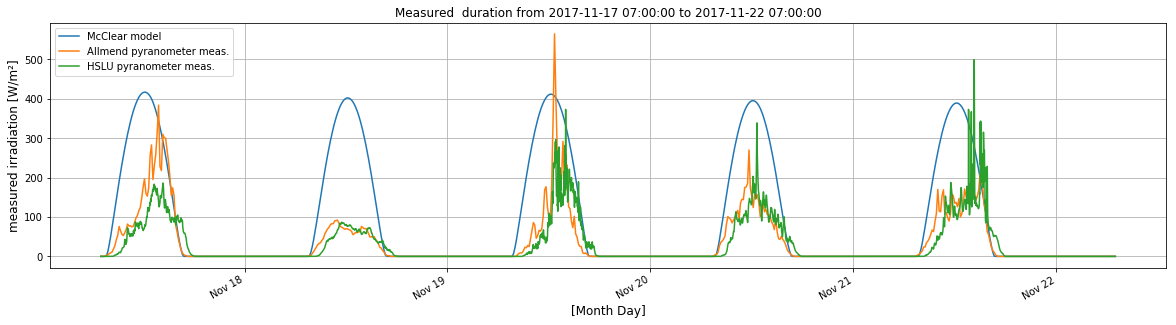

In [7]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-11-17 07:00:00' # beginning 
end   = '2017-11-22 07:00:00' # ending 

lu_rad     = df_lu.loc[start:end]
hslu_rad   = df_hslu17.loc[start:end]
mc_rad     = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

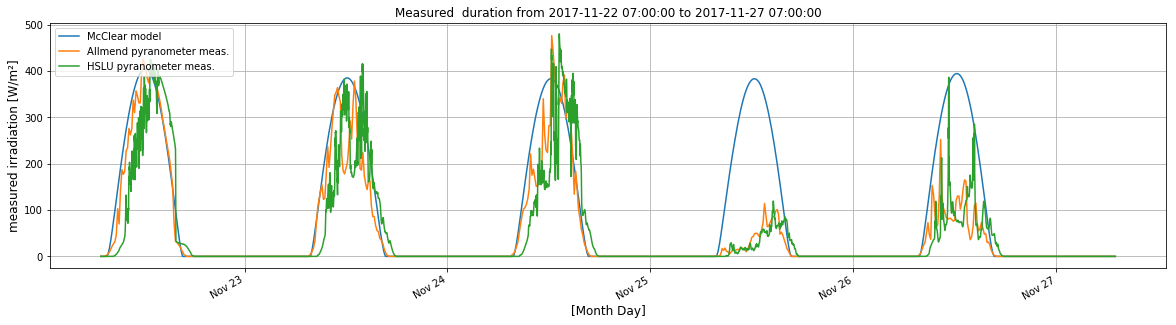

In [8]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-11-22 07:00:00' # beginning 
end   = '2017-11-27 07:00:00' # ending 

lu_rad     = df_lu.loc[start:end]
hslu_rad   = df_hslu17.loc[start:end]
mc_rad     = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

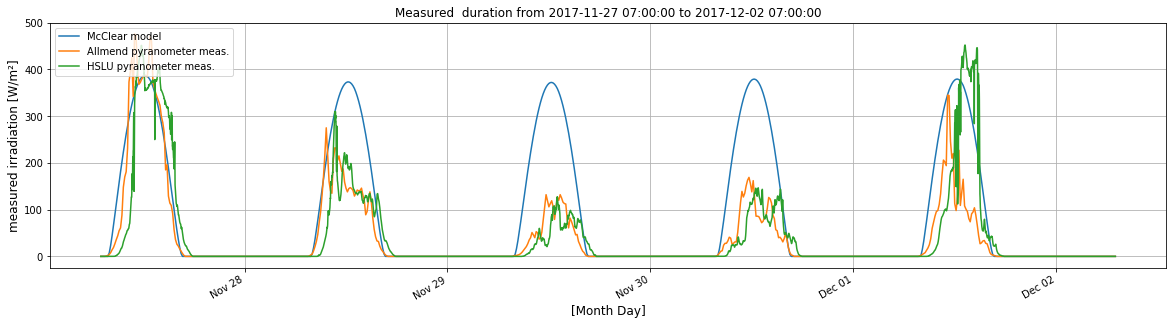

In [9]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-11-27 07:00:00' # beginning 
end   = '2017-12-02 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

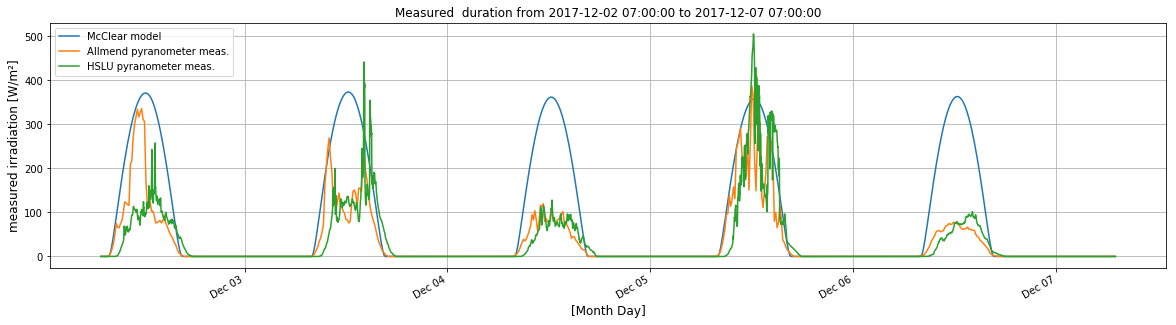

In [10]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-12-02 07:00:00' # beginning 
end   = '2017-12-07 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

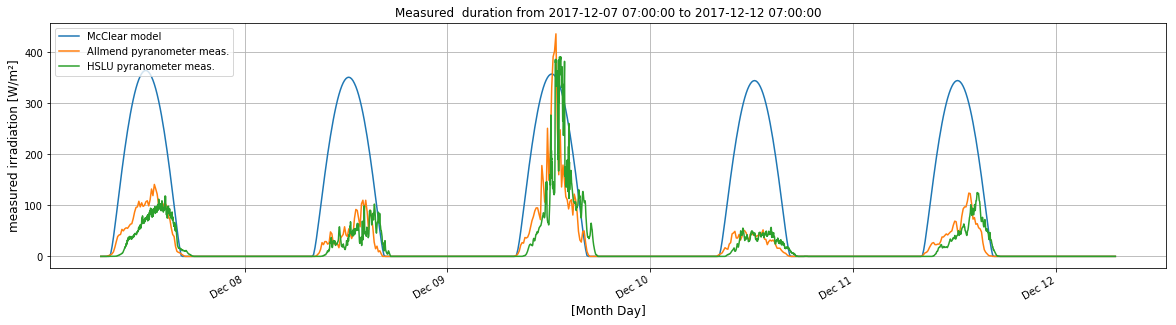

In [11]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-12-07 07:00:00' # beginning 
end   = '2017-12-12 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

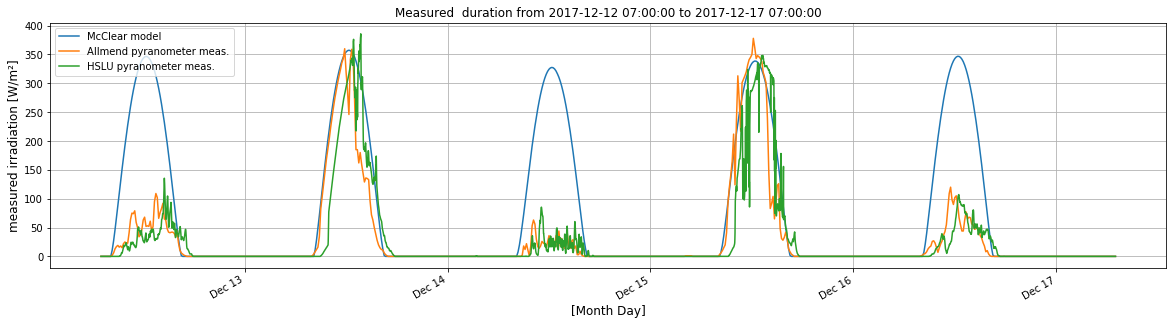

In [12]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-12-12 07:00:00' # beginning 
end   = '2017-12-17 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

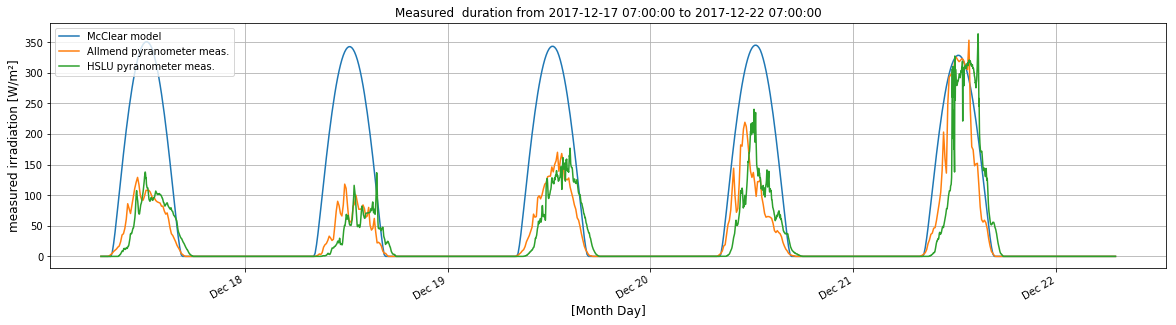

In [13]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-12-17 07:00:00' # beginning 
end   = '2017-12-22 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

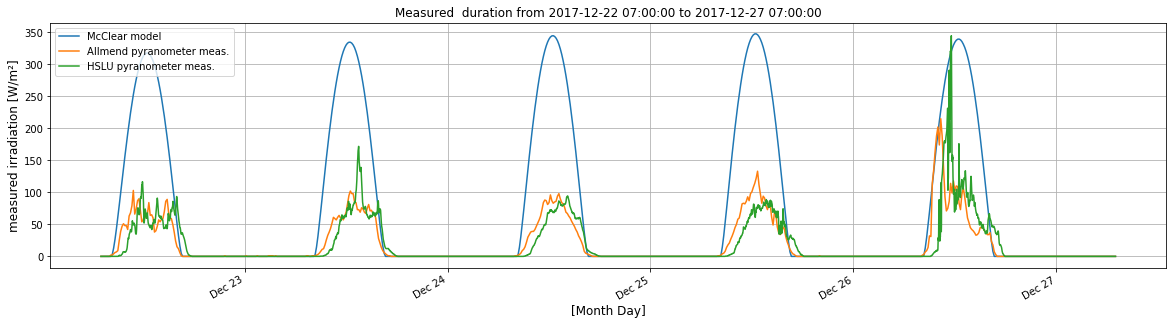

In [14]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-12-22 07:00:00' # beginning 
end   = '2017-12-27 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

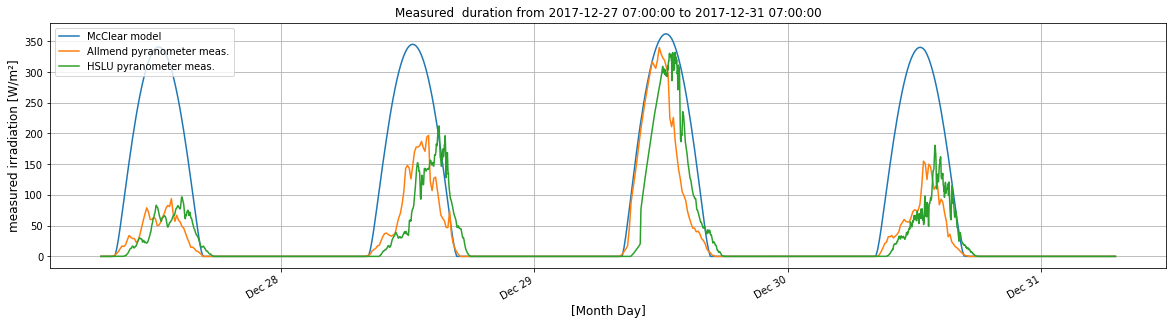

In [15]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2017-12-27 07:00:00' # beginning 
end   = '2017-12-31 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu17.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

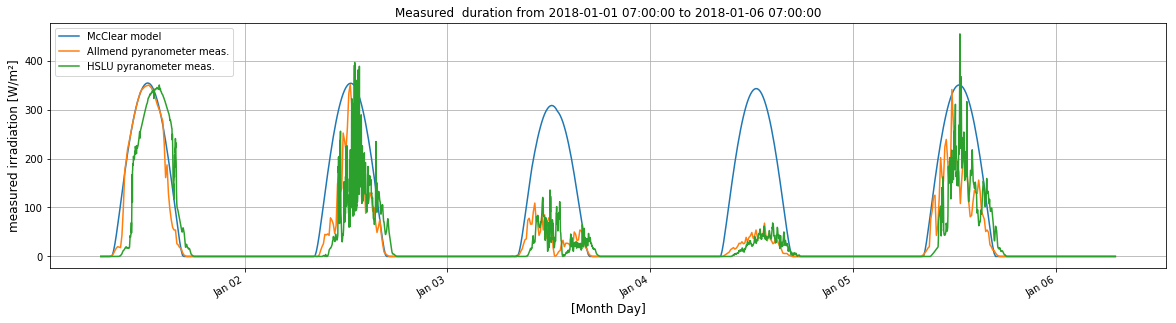

In [16]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-01 07:00:00' # beginning 
end   = '2018-01-06 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

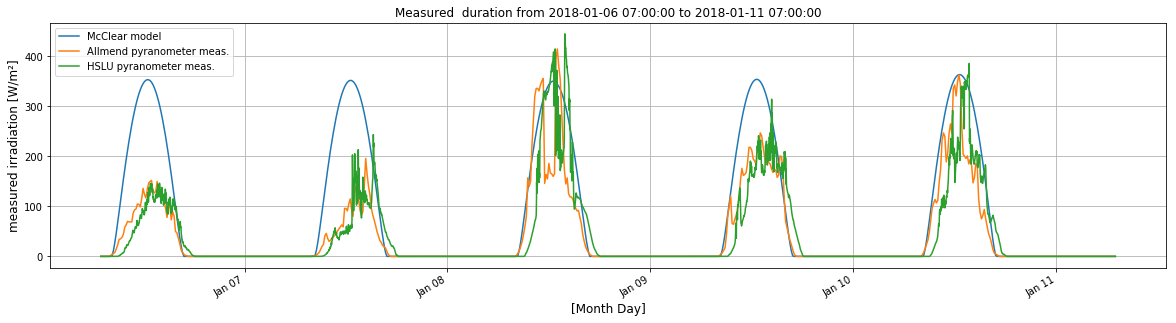

In [17]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-06 07:00:00' # beginning 
end   = '2018-01-11 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

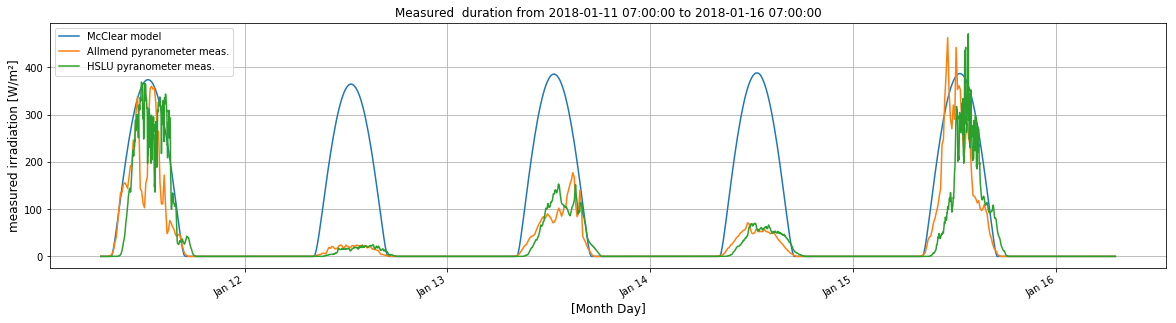

In [18]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-11 07:00:00' # beginning 
end   = '2018-01-16 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

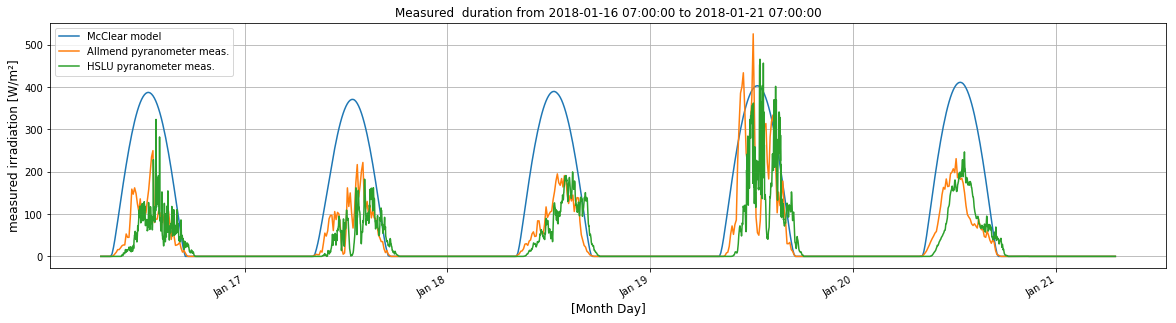

In [19]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-16 07:00:00' # beginning 
end   = '2018-01-21 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

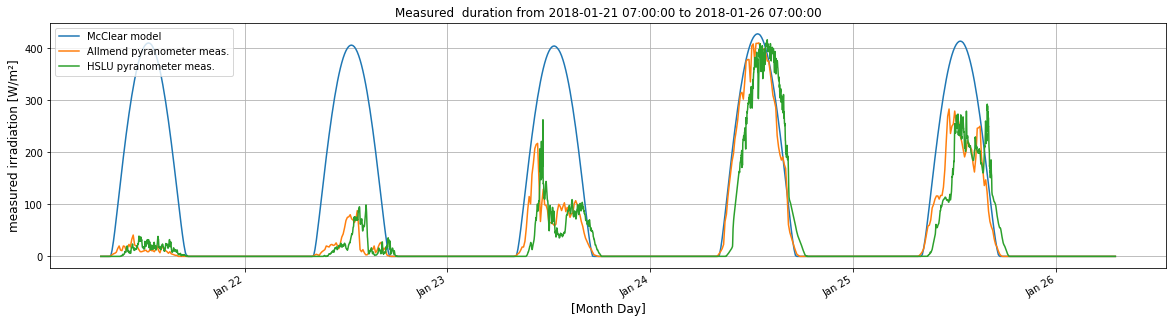

In [20]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-21 07:00:00' # beginning 
end   = '2018-01-26 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

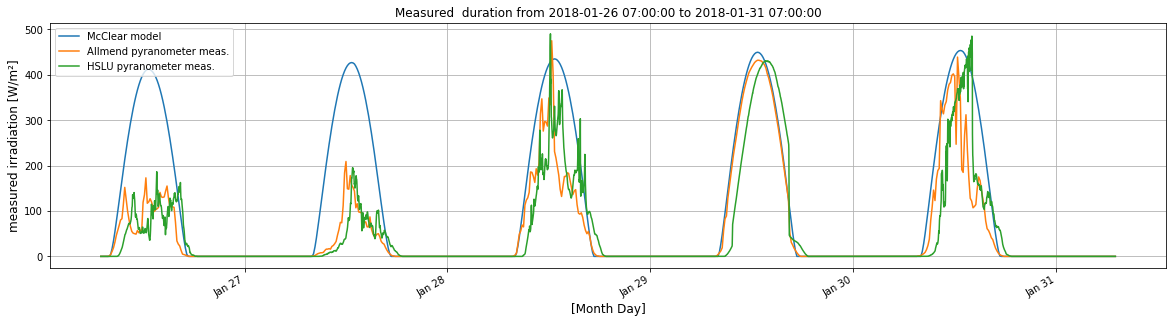

In [21]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-26 07:00:00' # beginning 
end   = '2018-01-31 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

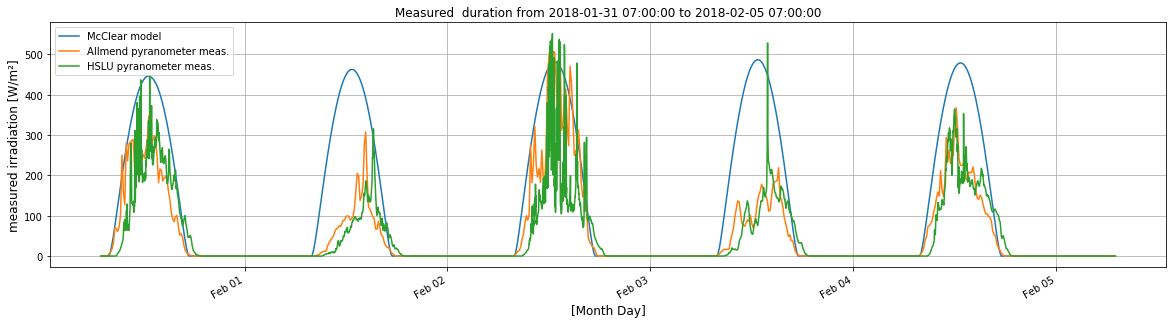

In [22]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-01-31 07:00:00' # beginning 
end   = '2018-02-05 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

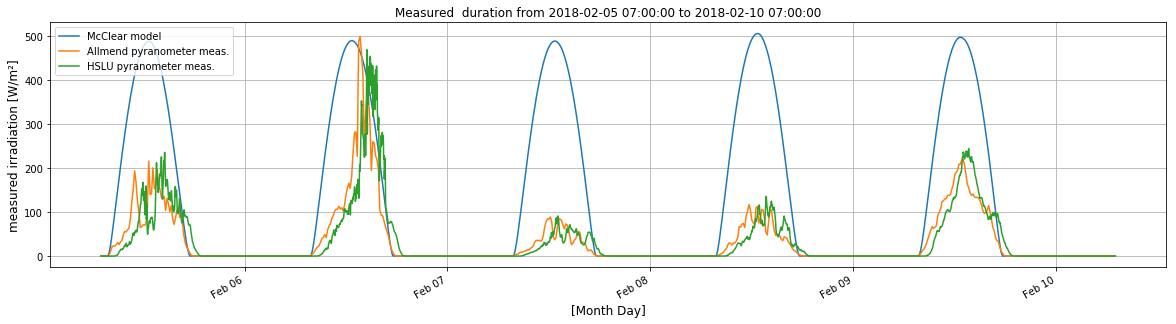

In [23]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-02-05 07:00:00' # beginning 
end   = '2018-02-10 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

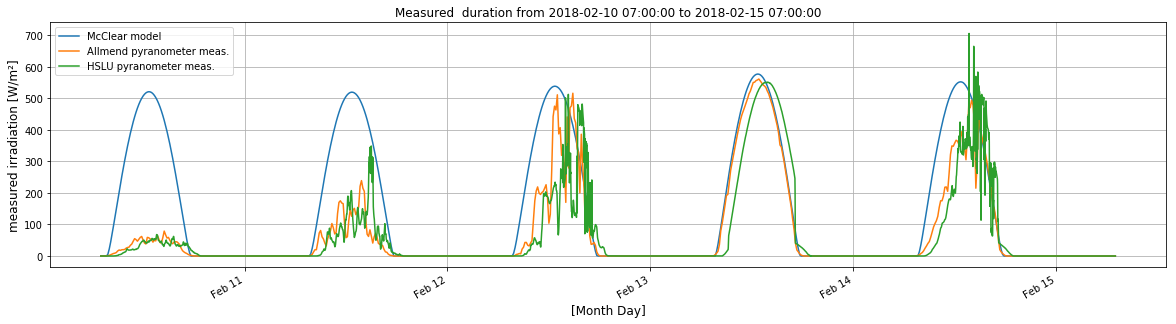

In [24]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-02-10 07:00:00' # beginning 
end   = '2018-02-15 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end] 

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

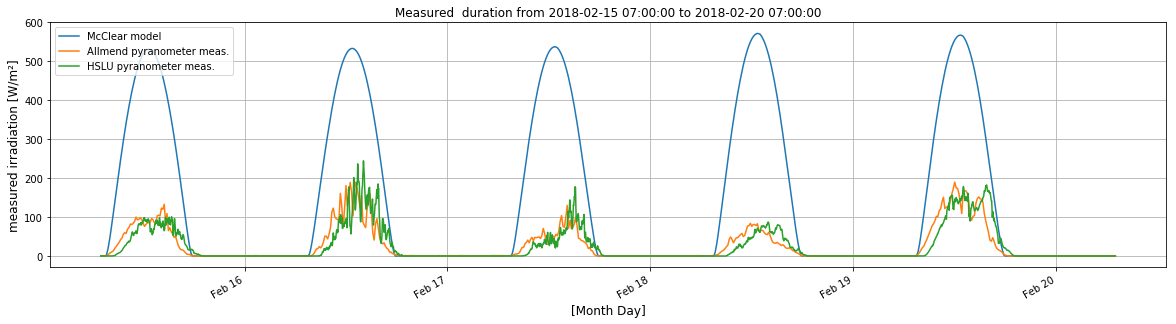

In [25]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-02-15 07:00:00' # beginning 
end   = '2018-02-20 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

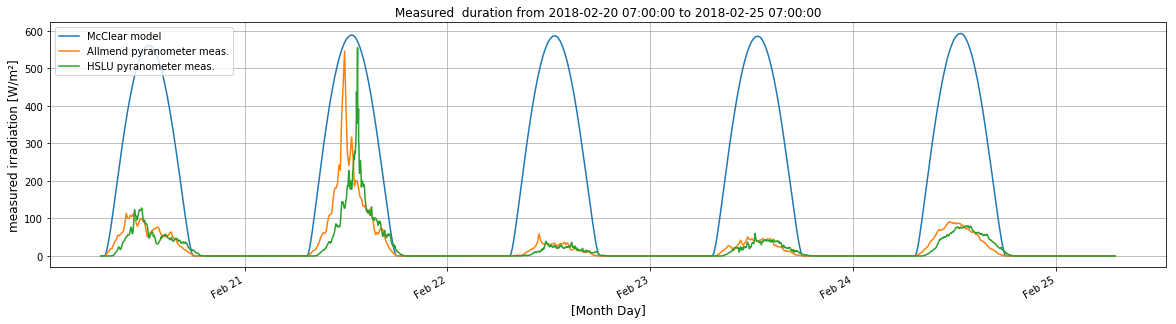

In [26]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-02-20 07:00:00' # beginning 
end   = '2018-02-25 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

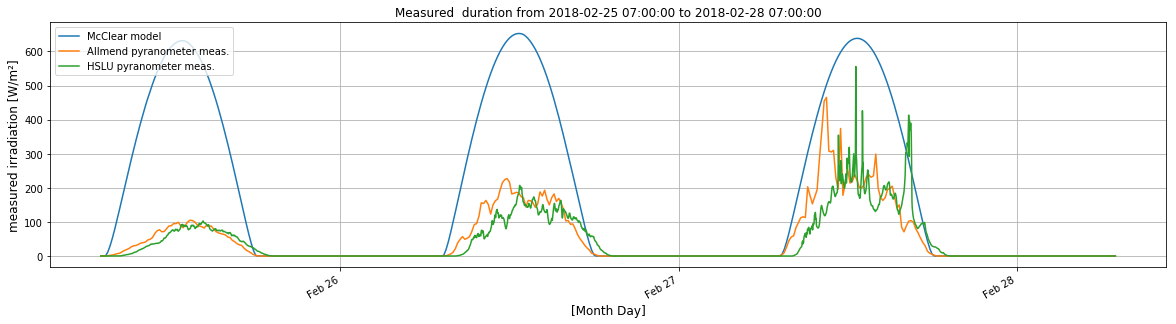

In [27]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-02-25 07:00:00' # beginning 
end   = '2018-02-28 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

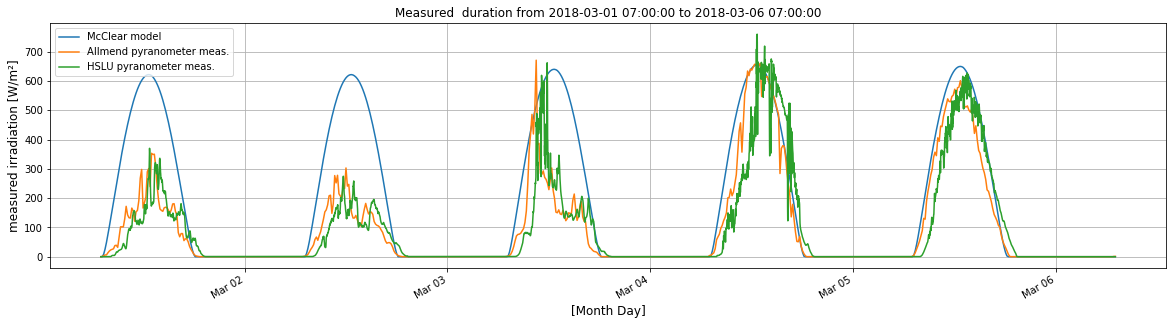

In [28]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-03-01 07:00:00' # beginning 
end   = '2018-03-06 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

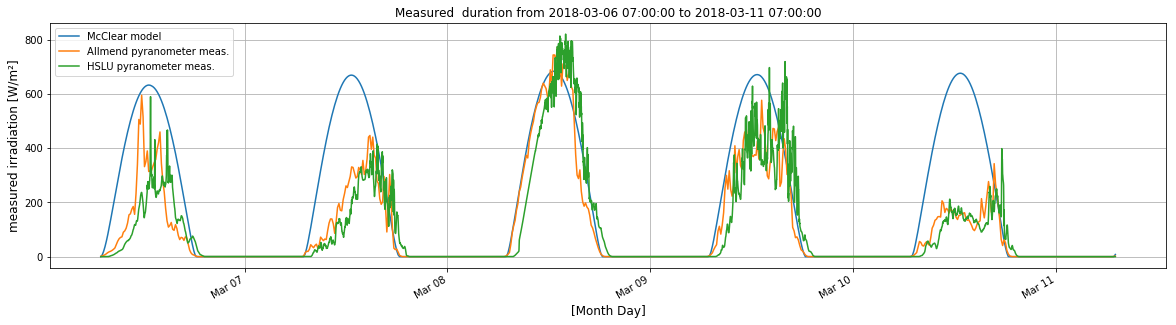

In [29]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-03-06 07:00:00' # beginning 
end   = '2018-03-11 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

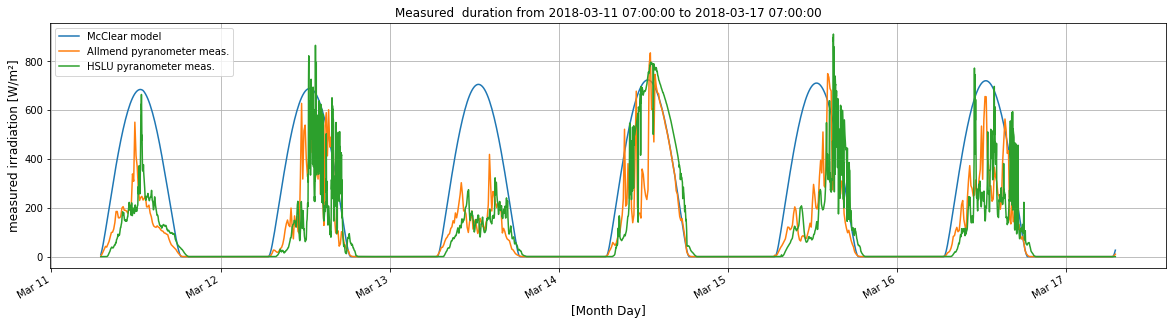

In [30]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-03-11 07:00:00' # beginning 
end   = '2018-03-17 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

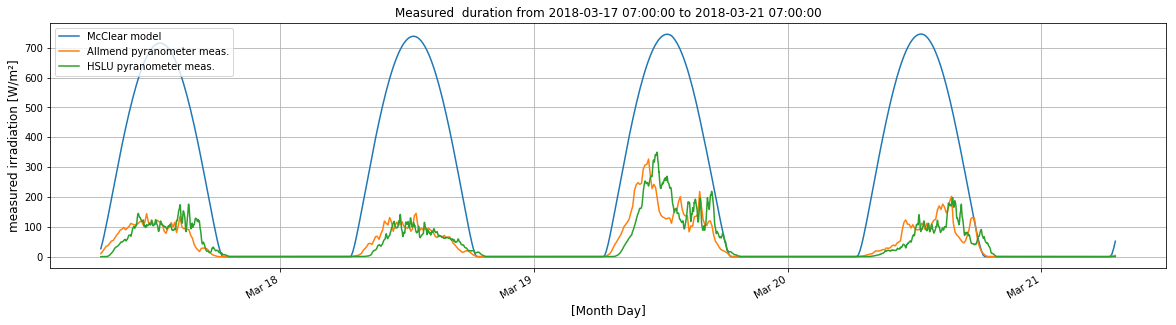

In [31]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-03-17 07:00:00' # beginning 
end   = '2018-03-21 07:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

##  Some excerpts from  2017 11.17 -  2018 01.03

#### 2018 03.12 

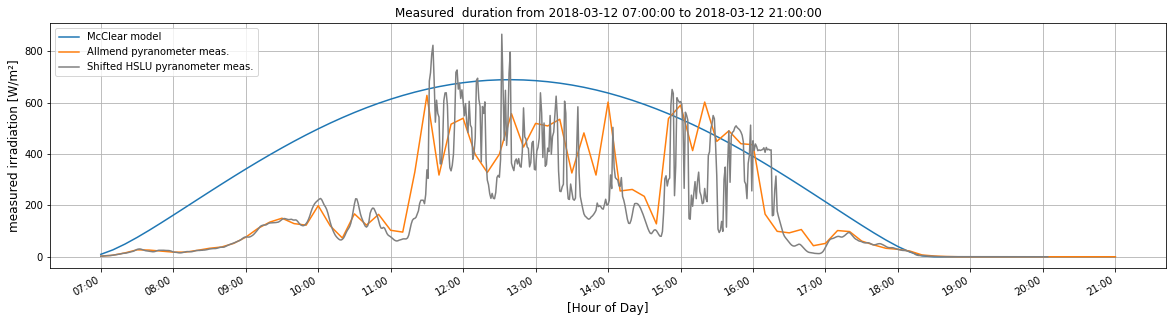

In [32]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-03-12 07:00:00' # beginning 
end   = '2018-03-12 21:00:00' # ending 

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

_hslu_rad = hslu_rad.shift(-56) # shift in minutes

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
#ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')
ax.plot(_hslu_rad.index, _hslu_rad,label='Shifted HSLU pyranometer meas.', color='gray')

ax.set_xlabel('[Hour of Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()

#### 2018  02.13

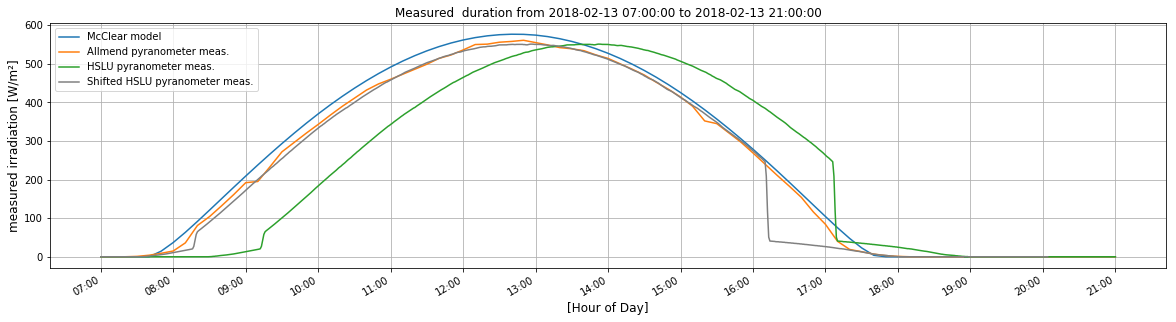

In [33]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

start = '2018-02-13 07:00:00' # beginning 
end   = '2018-02-13 21:00:00' # ending

lu_rad   = df_lu.loc[start:end]
hslu_rad = df_hslu18.loc[start:end]
mc_rad   = df_soda.loc[start:end]

_hslu_rad = hslu_rad.shift(-56)

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(mc_rad.index, mc_rad,label='McClear model')
ax.plot(lu_rad.index, lu_rad,label='Allmend pyranometer meas.')
ax.plot(hslu_rad.index, hslu_rad,label='HSLU pyranometer meas.')
ax.plot(_hslu_rad.index, _hslu_rad,label='Shifted HSLU pyranometer meas.', color='gray')

ax.set_xlabel('[Hour of Day]', fontsize=12)
ax.set_ylabel('measured irradiation [W/m²]', fontsize=12)
ax.set_title('Measured  duration from {} to {}'.format(start,end))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()